In [1908]:
%pylab inline
import pandas as pd
import os

Populating the interactive namespace from numpy and matplotlib


## Data Cleaning

In [1909]:
df = pd.read_csv("report1607729335336.csv",encoding='windows-1254')

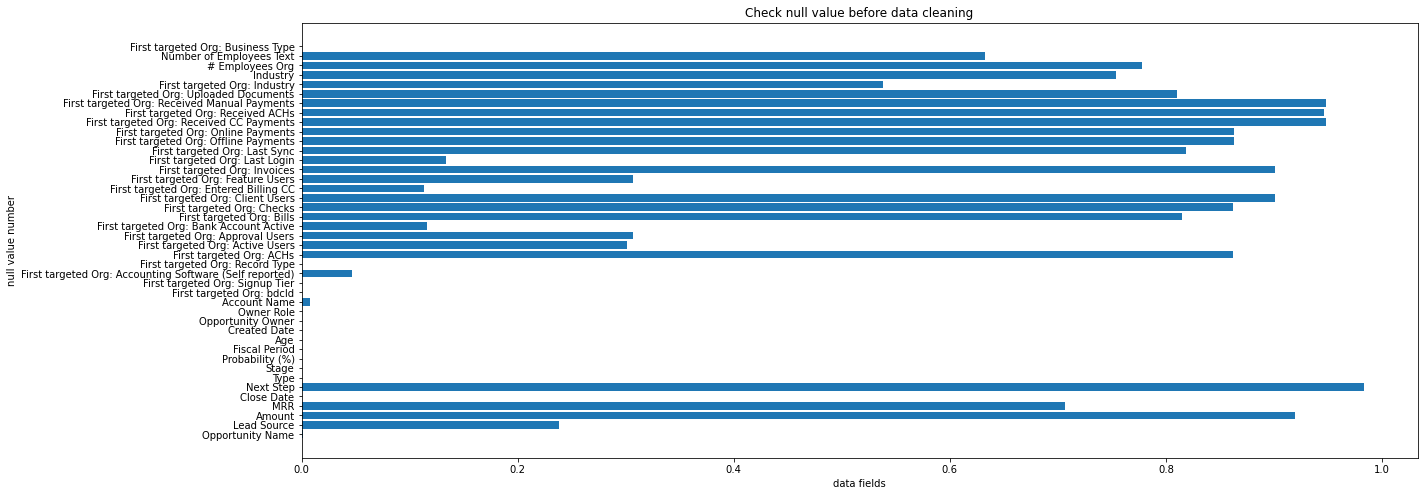

In [1911]:
plt.figure(figsize = (20,8))
x = df.columns.tolist()
y = df.isna().mean()
x_pros = [i for i, _ in enumerate(x)]
plt.barh(x_pros, y)
plt.ylabel("null value number")
plt.xlabel('data fields')
plt.title('Check null value before data cleaning')
plt.yticks(x_pros, x)
plt.show()

In [1912]:
df['cw'] = np.where((df['Probability (%)'] == 100) & (df['MRR'] > 0), True, False)

In [1913]:
percentage_close = df['cw'].sum() / len(df) *100
print('Number of observations is', str(len(df)))
print('Percentage of the close won is', percentage_close, '%')

Number of observations is 28552
Percentage of the close won is 28.190669655365646 %


In [1914]:
conditions = [
    (df['Type'] == 'Direct'),
    (df['Type'] == 'Accountant'),
    (df['Type'] == 'Accountant Client')
]
values = [(df['First targeted Org: Feature Users']+df['First targeted Org: Approval Users']),
          (df['First targeted Org: Active Users']),
          (df['First targeted Org: Client Users'])
         ]
df['user'] = np.select(conditions, values)
df[df['Type']=='Accountant Client'].user.unique()

array([nan,  4.,  3.,  1.,  2.,  6.,  5.,  7.,  8., 16., 12.,  9., 10.,
       20., 15., 11., 13., 14., 23., 25., 35., 17., 24.])

In [1915]:
df['industry_enter'] = np.where(pd.isnull(df['Industry']),1, 0)

In [1916]:
df['business_type'] = np.where(pd.isnull(df['First targeted Org: Business Type']),1, 0)

In [1917]:
df['n_employees_c'] = np.where(pd.isnull(df['# Employees Org']),df['Number of Employees Text'], df['# Employees Org'])

In [1918]:
df['n_employees_c_enter'] = np.where(pd.isnull(df['n_employees_c']),1, 0)

In [1919]:
df['close_date'] = pd.to_datetime(df['Close Date'], infer_datetime_format=True)

In [1920]:
df['last_login'] = pd.to_datetime(df['First targeted Org: Last Login'], infer_datetime_format=True)

In [1921]:
df['login_diff'] = df['close_date'] - df['last_login']

In [1922]:
df['last_sync'] = pd.to_datetime(df['First targeted Org: Last Sync'], infer_datetime_format=True)

In [1923]:
df['sync_diff'] = df['close_date'] - df['last_sync']

In [1924]:
df['sync_diff'] = df['sync_diff'].fillna(pd.Timedelta(seconds=0))

In [1925]:
df['login_diff'] = df['login_diff'].fillna(pd.Timedelta(seconds=0))

In [1926]:
from datetime import timedelta
df['login_diff'] = df.apply(lambda x: (x['login_diff'] / timedelta(minutes=1)), axis = 1)

In [1927]:
from datetime import timedelta
df['sync_diff'] = df.apply(lambda x: (x['sync_diff'] / timedelta(minutes=1)), axis = 1)

In [1928]:
df.columns

Index(['Opportunity Name', 'Lead Source', 'Amount', 'MRR', 'Close Date',
       'Next Step', 'Type', 'Stage', 'Probability (%)', 'Fiscal Period', 'Age',
       'Created Date', 'Opportunity Owner', 'Owner Role', 'Account Name',
       'First targeted Org: bdcId', 'First targeted Org: Signup Tier',
       'First targeted Org: Accounting Software (Self reported)',
       'First targeted Org: Record Type', 'First targeted Org: ACHs',
       'First targeted Org: Active Users',
       'First targeted Org: Approval Users',
       'First targeted Org: Bank Account Active', 'First targeted Org: Bills',
       'First targeted Org: Checks', 'First targeted Org: Client Users',
       'First targeted Org: Entered Billing CC',
       'First targeted Org: Feature Users', 'First targeted Org: Invoices',
       'First targeted Org: Last Login', 'First targeted Org: Last Sync',
       'First targeted Org: Offline Payments',
       'First targeted Org: Online Payments',
       'First targeted Org: Receiv

In [1929]:
df = df.drop(columns = ['Opportunity Name', 'Lead Source', 'Amount', 'MRR', 'Close Date','Probability (%)', 'Next Step',
             'Fiscal Period', 'Age', 'Created Date', 'Opportunity Owner', 'Owner Role', 'Account Name', 'Stage', 
              'First targeted Org: bdcId', 'First targeted Org: Record Type'])

In [1930]:
df = df.drop(columns = ['First targeted Org: Active Users',
       'First targeted Org: Approval Users', 'First targeted Org: Client Users','First targeted Org: Feature Users',
                        'First targeted Org: Industry', 'Industry'])

In [1931]:
df = df.drop(columns = ['# Employees Org',
       'Number of Employees Text', 'First targeted Org: Business Type','last_login', 'close_date',
                       'last_sync'])

In [1932]:
def sub_tier(x, y):
    st1 = ''
    if(x == 'Tier 1' and y == 'none'):
        st1 = st1 + 'Console_TBD'
    elif(x == 'Tier 1' and (y == 'netsuite2' or y == 'intacct2' or y == 'qbe')):
        st1 = st1 + 'MM_TIER1'
    elif(x == 'Tier 2' and y == 'msdynamics'):
        st1 = st1 + 'MM_TIER2'
    elif(x == 'Tier 1' and (y == 'qbd' or y == 'qboe2' or y == 'xero2')):
        st1 = st1 + 'SMB_TIER1'
    elif(x == 'Tier 2'):
        st1 = st1 + 'SMB_TIER2'
    elif(x == 'Tier 3'):
        st1 = st1 + 'SMB_TIER3'
    return str(st1)

In [1933]:
df['sub_tier'] = df.apply(lambda x: sub_tier(x['First targeted Org: Signup Tier'],
                                             x['First targeted Org: Accounting Software (Self reported)']),axis=1)

In [1934]:
df1 = df[df['Type'] == 'Direct']

In [1935]:
df1.columns

Index(['Type', 'First targeted Org: Signup Tier',
       'First targeted Org: Accounting Software (Self reported)',
       'First targeted Org: ACHs', 'First targeted Org: Bank Account Active',
       'First targeted Org: Bills', 'First targeted Org: Checks',
       'First targeted Org: Entered Billing CC',
       'First targeted Org: Invoices', 'First targeted Org: Last Login',
       'First targeted Org: Last Sync', 'First targeted Org: Offline Payments',
       'First targeted Org: Online Payments',
       'First targeted Org: Received CC Payments',
       'First targeted Org: Received ACHs',
       'First targeted Org: Received Manual Payments',
       'First targeted Org: Uploaded Documents', 'cw', 'user',
       'industry_enter', 'business_type', 'n_employees_c',
       'n_employees_c_enter', 'login_diff', 'sync_diff', 'sub_tier'],
      dtype='object')

In [1936]:
df = df.drop(columns = ['First targeted Org: Signup Tier','First targeted Org: Accounting Software (Self reported)'
                       ])

In [1937]:
df.columns

Index(['Type', 'First targeted Org: ACHs',
       'First targeted Org: Bank Account Active', 'First targeted Org: Bills',
       'First targeted Org: Checks', 'First targeted Org: Entered Billing CC',
       'First targeted Org: Invoices', 'First targeted Org: Last Login',
       'First targeted Org: Last Sync', 'First targeted Org: Offline Payments',
       'First targeted Org: Online Payments',
       'First targeted Org: Received CC Payments',
       'First targeted Org: Received ACHs',
       'First targeted Org: Received Manual Payments',
       'First targeted Org: Uploaded Documents', 'cw', 'user',
       'industry_enter', 'business_type', 'n_employees_c',
       'n_employees_c_enter', 'login_diff', 'sync_diff', 'sub_tier'],
      dtype='object')

In [1938]:
def employee_num(y):
    st1 = ''
    if(y == '10-Jun' or y == '5-Jan' or y == '10-Jan' or y == '9-May' or y == '4-Jan'):
        st1 = st1 + '1-9'
    if(y == '25-Nov' or y == '51-100' or y == 'Nov-50' or y == '26-50' or y == '19-Oct' or y == '20-49' 
       or y == '50-99'):
        st1 = st1 + '10-99'
    if(y == '51-250' or y == '101+' or y == '100-199' or y == '251-1K' or y == '200-499'):
        st1 = st1 + '100-499'
    if(y == '5K-10K' or y == '1K-5K' or y == '10K-50K' or y == '100K+' or y == '50K-100K'):
        st1 = st1 + '1000+'
    if(y == '500+'):
        st1 = st1 + '500-999'
    return str(st1)

In [1939]:
## df['employee_n'] = df.apply(lambda x: employee_num(x['n_employees_c']),axis=1)

In [1940]:
df = df.drop(columns = ['n_employees_c','First targeted Org: Last Login',
       'First targeted Org: Last Sync'])

In [1941]:
df['cw'] = df['cw'].astype(int)

In [1942]:
df['First targeted Org: Bank Account Active'] = df['First targeted Org: Bank Account Active'].fillna(0)

In [1943]:
df['First targeted Org: Entered Billing CC'] = df['First targeted Org: Entered Billing CC'].fillna(0)

In [1944]:
df['First targeted Org: Bank Account Active'] = df['First targeted Org: Bank Account Active'].replace(to_replace=['no', 'yes'], value=[0, 1])

In [1945]:
df['First targeted Org: Entered Billing CC'] = df['First targeted Org: Entered Billing CC'].replace(to_replace=['no', 'yes'], value=[0, 1])

In [1946]:
df['user'] = df['user'].fillna(0)

In [1947]:
df = pd.get_dummies(df, columns=['sub_tier'])

In [1948]:
df.isna().mean()

Type                                            0.000000
First targeted Org: ACHs                        0.862076
First targeted Org: Bank Account Active         0.000000
First targeted Org: Bills                       0.815249
First targeted Org: Checks                      0.862076
First targeted Org: Entered Billing CC          0.000000
First targeted Org: Invoices                    0.900462
First targeted Org: Offline Payments            0.862882
First targeted Org: Online Payments             0.863162
First targeted Org: Received CC Payments        0.948095
First targeted Org: Received ACHs               0.946484
First targeted Org: Received Manual Payments    0.947955
First targeted Org: Uploaded Documents          0.809996
cw                                              0.000000
user                                            0.000000
industry_enter                                  0.000000
business_type                                   0.000000
n_employees_c_enter            

In [1949]:
df = df.fillna(0)

In [1950]:
df_d = df[df['Type'] == 'Direct']
df_ac = df[df['Type'] == 'Accountant']
df_acl = df[df['Type'] == 'Accountant Client']
frames = [df_ac, df_acl]
df_a = pd.concat(frames)

In [1951]:
X_d = df_d.drop(['cw','Type'],1)
y_d = df_d['cw']

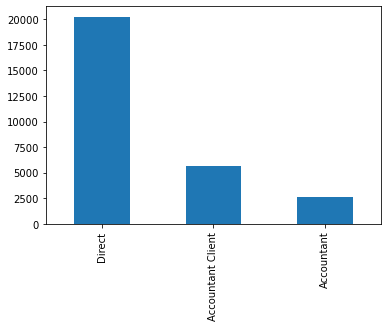

In [1952]:
df['Type'].value_counts().plot(kind='bar')

In [1954]:
percentage_cw = df1['cw'].sum() / len(df1['cw']) * 100
print('Number of observation is', str(len(df1)))
print('Percentage of the close won is', percentage_cw , '%')

Number of observation is 20234
Percentage of the close won is 13.714539883364635 %


In [1955]:
import sklearn 
import warnings
warnings.filterwarnings('ignore')

In [1956]:
import seaborn as sns, numpy as np

In [1957]:
column_list = df_d.columns.to_list()

In [1958]:
df_d.shape

(20234, 26)

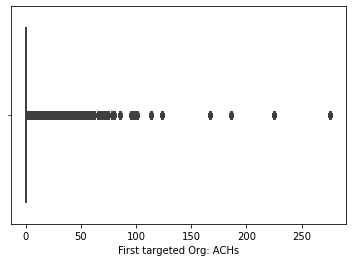

In [1959]:
for i in range(len(column_list)):
    sns.boxplot(x=df_d[column_list[1]])

In [1960]:
df_d = df_d[~((df_d[column_list[1]] > 110))]

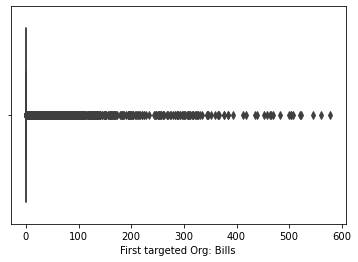

In [1967]:
sns.boxplot(x=df_d[column_list[3]])

In [1962]:
df_d = df_d[~((df_d[column_list[3]] > 600))]

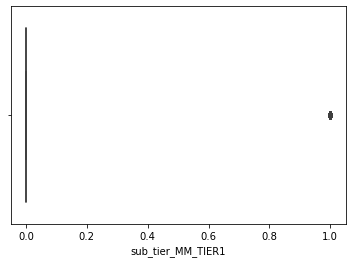

In [2003]:
sns.boxplot(x=df_d[column_list[20]])

In [2001]:
df_d = df_d[~((df_d[column_list[19]] >2e6 ))]

In [2004]:
df_d.shape

(20162, 26)

In [863]:
for n in range(1,35):
    dfd = df[df['Type']=='Direct']
##    dfd.iloc[:,[n]].plot(kind="hist")   

In [ ]:
## Look into data: 1) Feature distribution 2) Label distribution --> outlier 
## 3) Feature & feature colleration 4) Feature & label
## colleration -> Training error & Test error: overfit (use Cross validation 8-training 1-valid 1-test to see the
## overfit -> 

## Random Forests
## Gradient Boosting Decision Trees -- Tree models explanability weaker <- use shap value to explain
## Try different models

In [1681]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [2005]:
X_d = df_d.drop(['cw','Type'],1)
y_d = df_d['cw']

In [2006]:
X = X_d.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,32.417640
1,First targeted Org: Bank Account Active,1.661349
2,First targeted Org: Bills,2.886644
3,First targeted Org: Checks,34.029429
4,First targeted Org: Entered Billing CC,1.186304
5,First targeted Org: Invoices,1.282091
6,First targeted Org: Offline Payments,1.925683
7,First targeted Org: Online Payments,87.134741
8,First targeted Org: Received CC Payments,1.017693
9,First targeted Org: Received ACHs,1.273546


In [2007]:
X = X_d.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF
0,First targeted Org: ACHs,32.417640
3,First targeted Org: Checks,34.029429
7,First targeted Org: Online Payments,87.134741
13,industry_enter,10.154744


In [2008]:
X_d = X_d.drop(['First targeted Org: Online Payments'],1)

In [2009]:
X = X_d.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF
12,industry_enter,10.154702


In [2011]:
X = X_d.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 2.5]

,variables,VIF
2,First targeted Org: Bills,2.868537
11,user,2.849624
13,n_employees_c_enter,3.688885
18,sub_tier_SMB_TIER1,2.739233
20,sub_tier_SMB_TIER3,2.966993


In [2010]:
X_d = X_d.drop(['industry_enter'],1)

In [2013]:
X = X_d.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,1.321436
1,First targeted Org: Bank Account Active,1.656700
2,First targeted Org: Bills,2.868537
3,First targeted Org: Checks,1.477661
4,First targeted Org: Entered Billing CC,1.183705
5,First targeted Org: Invoices,1.281748
6,First targeted Org: Offline Payments,1.919934
7,First targeted Org: Received CC Payments,1.017634
8,First targeted Org: Received ACHs,1.272639
9,First targeted Org: Received Manual Payments,1.146466


## Model Running 

## For Direct

In [2014]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.33, random_state=101)

### Lasso Logistic Regression

In [2015]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2016]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9264880071068996

In [2017]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[5636  457]
 [  94  467]]


In [2018]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9171926660655245

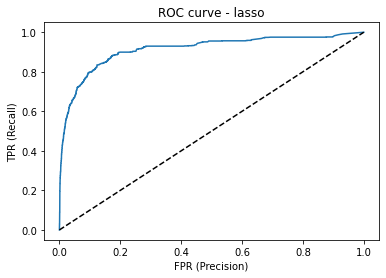

Area under curve (AUC):  0.9136721553606371


In [2019]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2020]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5730
           1       0.83      0.51      0.63       924

    accuracy                           0.92      6654
   macro avg       0.88      0.74      0.79      6654
weighted avg       0.91      0.92      0.91      6654



### Ridge Logistic Regression

In [2021]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2022]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.8962836837429672

In [2023]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[5481  507]
 [ 249  417]]


In [2024]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8863841298467088

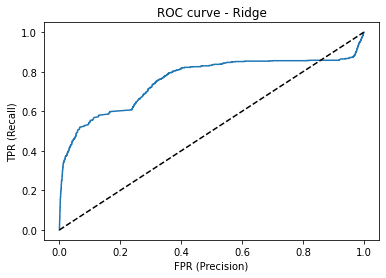

Area under curve (AUC):  0.757131619108059


In [2025]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2026]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5730
           1       0.63      0.45      0.52       924

    accuracy                           0.89      6654
   macro avg       0.77      0.70      0.73      6654
weighted avg       0.88      0.89      0.88      6654



Text(0.5, 0, 'False Positive Rate')

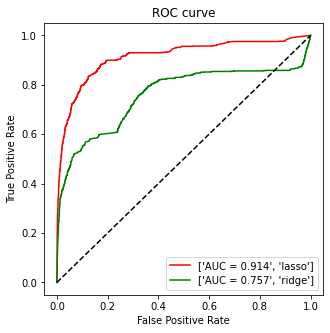

In [2027]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Lasso is better than ridge.

In [2028]:
df_d[df_d.columns[1:]].corr()['cw'][:]

First targeted Org: ACHs                        0.306998
First targeted Org: Bank Account Active         0.510251
First targeted Org: Bills                       0.279325
First targeted Org: Checks                      0.259499
First targeted Org: Entered Billing CC          0.395699
First targeted Org: Invoices                    0.155040
First targeted Org: Offline Payments            0.184186
First targeted Org: Online Payments             0.356081
First targeted Org: Received CC Payments        0.040429
First targeted Org: Received ACHs               0.112348
First targeted Org: Received Manual Payments    0.101286
First targeted Org: Uploaded Documents          0.305828
cw                                              1.000000
user                                            0.373863
industry_enter                                 -0.120519
business_type                                  -0.005568
n_employees_c_enter                            -0.196735
login_diff                     

In [2029]:
corr_matrix = df_d.corr()
print(corr_matrix["cw"].sort_values(ascending=False))

cw                                              1.000000
First targeted Org: Bank Account Active         0.510251
First targeted Org: Entered Billing CC          0.395699
user                                            0.373863
First targeted Org: Online Payments             0.356081
First targeted Org: ACHs                        0.306998
First targeted Org: Uploaded Documents          0.305828
First targeted Org: Bills                       0.279325
First targeted Org: Checks                      0.259499
sub_tier_SMB_TIER1                              0.213897
First targeted Org: Offline Payments            0.184186
First targeted Org: Invoices                    0.155040
sync_diff                                       0.129649
First targeted Org: Received ACHs               0.112348
First targeted Org: Received Manual Payments    0.101286
login_diff                                      0.063351
sub_tier_TBD                                    0.061553
sub_tier_MM_TIER1              

In [2031]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,2.833607,1.0
1,First targeted Org: Bank Account Active,2.433203,2.0
21,sub_tier_TBD,0.926605,3.0
0,First targeted Org: ACHs,0.415706,4.0
11,user,0.388222,5.0
9,First targeted Org: Received Manual Payments,0.134601,6.0
7,First targeted Org: Received CC Payments,0.079752,7.0
3,First targeted Org: Checks,0.047544,8.0
6,First targeted Org: Offline Payments,0.013838,9.0
10,First targeted Org: Uploaded Documents,0.011184,10.0


## For Accountant Console

In [2032]:
df_ac.shape

(2648, 26)

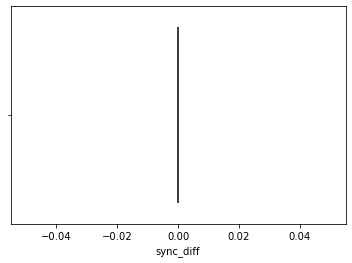

In [2050]:
for i in range(len(column_list)):
    sns.boxplot(x=df_ac[column_list[19]])

In [2042]:
df_ac = df_ac[~((df_ac[column_list[18]] > 2e6))]

In [2051]:
df_ac.shape

(2643, 26)

In [2052]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [2053]:
X_ac = df_ac.drop(['cw','Type'],1)
y_ac = df_ac['cw']

In [2060]:
X = X_ac.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,NaN
1,First targeted Org: Bank Account Active,inf
2,First targeted Org: Bills,inf
3,First targeted Org: Checks,NaN
4,First targeted Org: Entered Billing CC,1.231049
5,First targeted Org: Invoices,NaN
6,First targeted Org: Offline Payments,NaN
7,First targeted Org: Online Payments,NaN
8,First targeted Org: Received CC Payments,NaN
9,First targeted Org: Received ACHs,NaN


In [2061]:
X = X_ac.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF
1,First targeted Org: Bank Account Active,inf
2,First targeted Org: Bills,inf


In [2062]:
calc_vif(X)[calc_vif(X)['VIF'].isna() == False]

,variables,VIF
1,First targeted Org: Bank Account Active,inf
2,First targeted Org: Bills,inf
4,First targeted Org: Entered Billing CC,1.231049
12,user,1.365199
13,industry_enter,2.403056
15,n_employees_c_enter,1.953924
16,login_diff,1.115915
20,sub_tier_SMB_TIER1,1.333889


In [2063]:
X_ac = df_ac.drop(['cw','Type'],1)
y_ac = df_ac['cw']

In [2064]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ac, y_ac, test_size=0.33, random_state=101)

### Lasso Logistic Regression

In [2065]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2066]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9451977401129944

In [2067]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[725  42]
 [ 21  85]]


In [2068]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9278350515463918

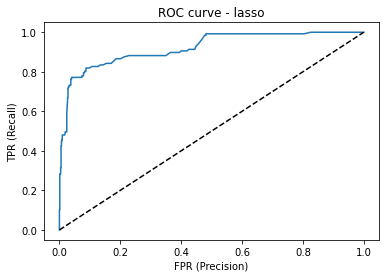

Area under curve (AUC):  0.9213812247999832


In [2069]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2070]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       746
           1       0.80      0.67      0.73       127

    accuracy                           0.93       873
   macro avg       0.87      0.82      0.84       873
weighted avg       0.92      0.93      0.93       873



### Ridge Logistic Regression

In [2071]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2072]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.867231638418079

In [2073]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[746 126]
 [  0   1]]


In [2078]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8556701030927835

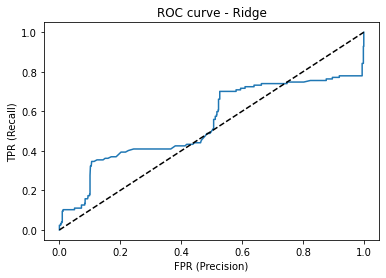

Area under curve (AUC):  0.5420246564353719


In [2079]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2080]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       746
           1       1.00      0.01      0.02       127

    accuracy                           0.86       873
   macro avg       0.93      0.50      0.47       873
weighted avg       0.88      0.86      0.79       873



Text(0.5, 0, 'False Positive Rate')

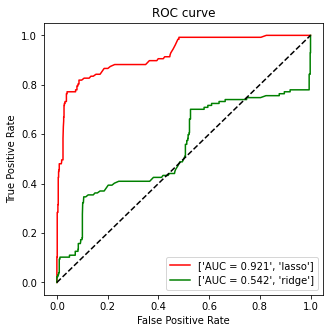

In [2081]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [2083]:
df_ac.user.unique()

array([ 1.,  0.,  3.,  2.,  5.,  9.,  8.,  6., 10., 67., 12.,  4., 13.,
       28.,  7., 19., 68., 16., 11., 22.])

In [2084]:
corr_matrix = df_ac.corr()
print(corr_matrix["cw"].sort_values(ascending=False))

cw                                              1.000000
First targeted Org: Entered Billing CC          0.683689
user                                            0.272459
login_diff                                      0.085784
sub_tier_TBD                                    0.015534
First targeted Org: Bills                      -0.007763
First targeted Org: Bank Account Active        -0.007763
sub_tier_SMB_TIER1                             -0.015534
industry_enter                                 -0.225952
n_employees_c_enter                            -0.334968
First targeted Org: ACHs                             NaN
First targeted Org: Checks                           NaN
First targeted Org: Invoices                         NaN
First targeted Org: Offline Payments                 NaN
First targeted Org: Online Payments                  NaN
First targeted Org: Received CC Payments             NaN
First targeted Org: Received ACHs                    NaN
First targeted Org: Received Ma

In [2085]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,3.736167,1.0
12,user,0.705793,2.0
16,login_diff,0.000004,3.0
0,First targeted Org: ACHs,0.000000,12.5
21,sub_tier_SMB_TIER2,0.000000,12.5
20,sub_tier_SMB_TIER1,0.000000,12.5
19,sub_tier_MM_TIER2,0.000000,12.5
18,sub_tier_MM_TIER1,0.000000,12.5
17,sync_diff,0.000000,12.5
14,business_type,0.000000,12.5


## For Accountant Client

In [2086]:
df_acl.shape

(5670, 26)

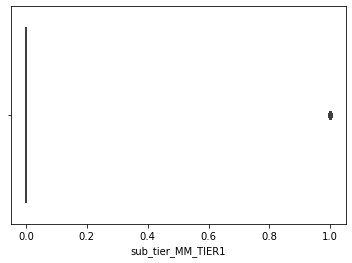

In [2139]:
for i in range(len(column_list)):
    sns.boxplot(x=df_acl[column_list[20]])

In [2137]:
df_acl = df_acl[~((df_acl[column_list[19]] > 600000))]

In [2140]:
df_acl.shape

(5616, 26)

In [2141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [2142]:
X_acl = df_acl.drop(['cw','Type'],1)
y_acl = df_acl['cw']

In [2143]:
X = X_acl.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,31.311708
1,First targeted Org: Bank Account Active,1.359000
2,First targeted Org: Bills,1.717680
3,First targeted Org: Checks,106.598910
4,First targeted Org: Entered Billing CC,1.139868
5,First targeted Org: Invoices,1.116715
6,First targeted Org: Offline Payments,1.335288
7,First targeted Org: Online Payments,168.100082
8,First targeted Org: Received CC Payments,1.011758
9,First targeted Org: Received ACHs,1.206658


In [2144]:
X = X_acl.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF
0,First targeted Org: ACHs,31.311708
3,First targeted Org: Checks,106.598910
7,First targeted Org: Online Payments,168.100082


In [2147]:
X_acl = X_acl.drop(['First targeted Org: Online Payments'],1)

In [2148]:
X = X_acl.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF


In [2149]:
X = X_acl.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,1.264799
1,First targeted Org: Bank Account Active,1.354266
2,First targeted Org: Bills,1.715502
3,First targeted Org: Checks,1.393501
4,First targeted Org: Entered Billing CC,1.139831
5,First targeted Org: Invoices,1.116357
6,First targeted Org: Offline Payments,1.333757
7,First targeted Org: Received CC Payments,1.011738
8,First targeted Org: Received ACHs,1.206404
9,First targeted Org: Received Manual Payments,1.187173


In [2152]:
X_acl = df_ac.drop(['cw','Type'],1)
y_acl = df_ac['cw']

In [2169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_acl, y_acl, test_size=0.33, random_state=101)

### Lasso Logistic Regression

In [2154]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2155]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9451977401129944

In [2156]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[725  42]
 [ 21  85]]


In [2157]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9278350515463918

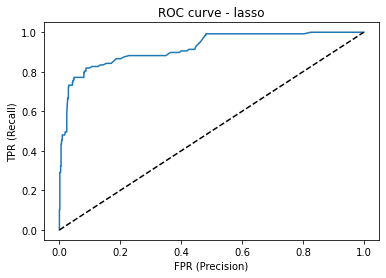

Area under curve (AUC):  0.9209695805450592


In [2158]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       746
           1       0.80      0.67      0.73       127

    accuracy                           0.93       873
   macro avg       0.87      0.82      0.84       873
weighted avg       0.92      0.93      0.93       873



### Ridge Logistic Regression

In [2160]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2161]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.867231638418079

In [2162]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[746 126]
 [  0   1]]


In [2163]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8556701030927835

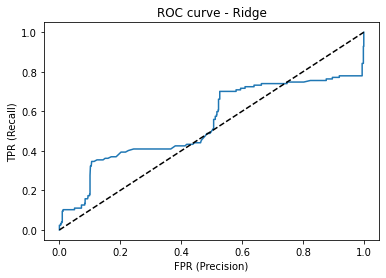

Area under curve (AUC):  0.5420246564353719


In [2164]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       746
           1       1.00      0.01      0.02       127

    accuracy                           0.86       873
   macro avg       0.93      0.50      0.47       873
weighted avg       0.88      0.86      0.79       873



Text(0.5, 0, 'False Positive Rate')

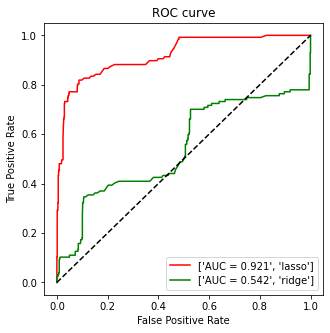

In [2166]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Lasso is better than ridge.

In [2167]:
corr_matrix = df_acl.corr()
print(corr_matrix["cw"].sort_values(ascending=False))

cw                                              1.000000
First targeted Org: Bank Account Active         0.287474
user                                            0.140511
First targeted Org: Online Payments             0.118543
First targeted Org: Uploaded Documents          0.106615
First targeted Org: Entered Billing CC          0.099543
First targeted Org: Checks                      0.096585
First targeted Org: ACHs                        0.094048
First targeted Org: Offline Payments            0.077188
First targeted Org: Bills                       0.077176
sync_diff                                       0.067523
sub_tier_SMB_TIER1                              0.062228
sub_tier_MM_TIER1                               0.031237
First targeted Org: Received Manual Payments    0.019095
First targeted Org: Received ACHs               0.018975
First targeted Org: Received CC Payments        0.009785
sub_tier_MM_TIER2                               0.009664
First targeted Org: Invoices   

In [2170]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,3.726390,1.0
12,user,0.689038,2.0
16,login_diff,0.000004,3.0
0,First targeted Org: ACHs,0.000000,12.5
21,sub_tier_SMB_TIER2,0.000000,12.5
20,sub_tier_SMB_TIER1,0.000000,12.5
19,sub_tier_MM_TIER2,0.000000,12.5
18,sub_tier_MM_TIER1,0.000000,12.5
17,sync_diff,0.000000,12.5
14,business_type,0.000000,12.5


## For Accountant Channel

In [2171]:
X_a = df_ac.drop(['cw','Type'],1)
y_a = df_ac['cw']

In [2172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.33, random_state=101)

### Lasso Logistic Regression

In [2173]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2174]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9446327683615819

In [2175]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[725  42]
 [ 21  85]]


In [2176]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9278350515463918

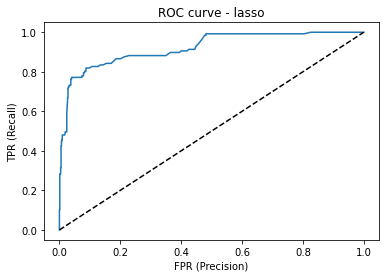

Area under curve (AUC):  0.9213812247999832


In [2177]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       746
           1       0.80      0.67      0.73       127

    accuracy                           0.93       873
   macro avg       0.87      0.82      0.84       873
weighted avg       0.92      0.93      0.93       873



### Ridge Logistic Regression

In [2179]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2180]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.867231638418079

In [2181]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[746 126]
 [  0   1]]


In [2182]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8556701030927835

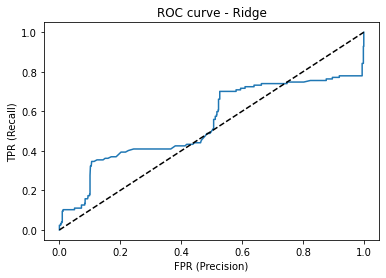

Area under curve (AUC):  0.5420246564353719


In [2183]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       746
           1       1.00      0.01      0.02       127

    accuracy                           0.86       873
   macro avg       0.93      0.50      0.47       873
weighted avg       0.88      0.86      0.79       873



Text(0.5, 0, 'False Positive Rate')

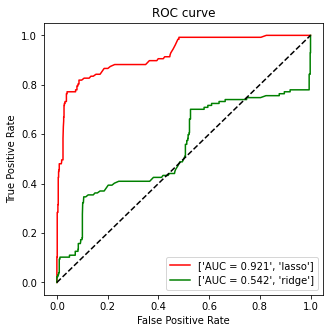

In [2185]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Lasso is better than ridge.

In [2187]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,3.737393,1.0
12,user,0.703570,2.0
16,login_diff,0.000004,3.0
0,First targeted Org: ACHs,0.000000,12.5
21,sub_tier_SMB_TIER2,0.000000,12.5
20,sub_tier_SMB_TIER1,0.000000,12.5
19,sub_tier_MM_TIER2,0.000000,12.5
18,sub_tier_MM_TIER1,0.000000,12.5
17,sync_diff,0.000000,12.5
14,business_type,0.000000,12.5


# Drop Tier 3

In [ ]:
df_d = df_d[df_d['sub_tier_SMB_TIER3']!=1]
df_d = df_d.drop(['sub_tier_SMB_TIER3'],1)

In [ ]:
X_d = df_d.drop(['cw','Type'],1)
y_d = df_d['cw']

## For Direct

In [2196]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_d, y_d, test_size=0.33, random_state=101)

ValueError: Found input variables with inconsistent numbers of samples: [12583, 20162]

### Lasso Logistic Regression

In [2015]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2016]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9264880071068996

In [2017]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[5636  457]
 [  94  467]]


In [2018]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9171926660655245

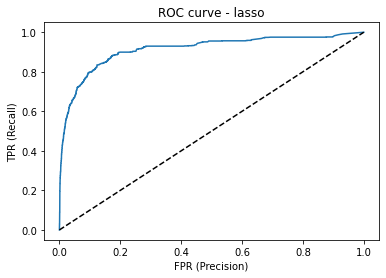

Area under curve (AUC):  0.9136721553606371


In [2019]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2020]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      5730
           1       0.83      0.51      0.63       924

    accuracy                           0.92      6654
   macro avg       0.88      0.74      0.79      6654
weighted avg       0.91      0.92      0.91      6654



### Ridge Logistic Regression

In [2021]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2022]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.8962836837429672

In [2023]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[5481  507]
 [ 249  417]]


In [2024]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8863841298467088

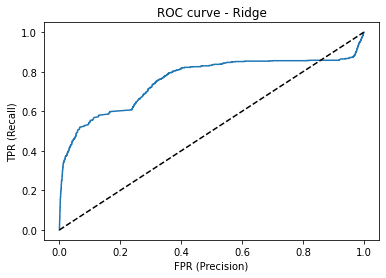

Area under curve (AUC):  0.757131619108059


In [2025]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2026]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      5730
           1       0.63      0.45      0.52       924

    accuracy                           0.89      6654
   macro avg       0.77      0.70      0.73      6654
weighted avg       0.88      0.89      0.88      6654



Text(0.5, 0, 'False Positive Rate')

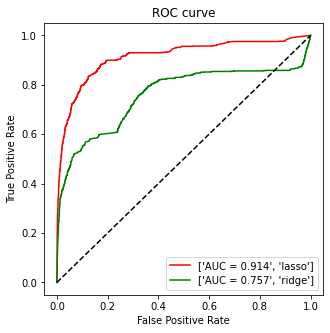

In [2027]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Lasso is better than ridge.

In [2028]:
df_d[df_d.columns[1:]].corr()['cw'][:]

First targeted Org: ACHs                        0.306998
First targeted Org: Bank Account Active         0.510251
First targeted Org: Bills                       0.279325
First targeted Org: Checks                      0.259499
First targeted Org: Entered Billing CC          0.395699
First targeted Org: Invoices                    0.155040
First targeted Org: Offline Payments            0.184186
First targeted Org: Online Payments             0.356081
First targeted Org: Received CC Payments        0.040429
First targeted Org: Received ACHs               0.112348
First targeted Org: Received Manual Payments    0.101286
First targeted Org: Uploaded Documents          0.305828
cw                                              1.000000
user                                            0.373863
industry_enter                                 -0.120519
business_type                                  -0.005568
n_employees_c_enter                            -0.196735
login_diff                     

In [2029]:
corr_matrix = df_d.corr()
print(corr_matrix["cw"].sort_values(ascending=False))

cw                                              1.000000
First targeted Org: Bank Account Active         0.510251
First targeted Org: Entered Billing CC          0.395699
user                                            0.373863
First targeted Org: Online Payments             0.356081
First targeted Org: ACHs                        0.306998
First targeted Org: Uploaded Documents          0.305828
First targeted Org: Bills                       0.279325
First targeted Org: Checks                      0.259499
sub_tier_SMB_TIER1                              0.213897
First targeted Org: Offline Payments            0.184186
First targeted Org: Invoices                    0.155040
sync_diff                                       0.129649
First targeted Org: Received ACHs               0.112348
First targeted Org: Received Manual Payments    0.101286
login_diff                                      0.063351
sub_tier_TBD                                    0.061553
sub_tier_MM_TIER1              

In [2031]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,2.833607,1.0
1,First targeted Org: Bank Account Active,2.433203,2.0
21,sub_tier_TBD,0.926605,3.0
0,First targeted Org: ACHs,0.415706,4.0
11,user,0.388222,5.0
9,First targeted Org: Received Manual Payments,0.134601,6.0
7,First targeted Org: Received CC Payments,0.079752,7.0
3,First targeted Org: Checks,0.047544,8.0
6,First targeted Org: Offline Payments,0.013838,9.0
10,First targeted Org: Uploaded Documents,0.011184,10.0


## For Accountant Console

In [2032]:
df_ac.shape

(2648, 26)

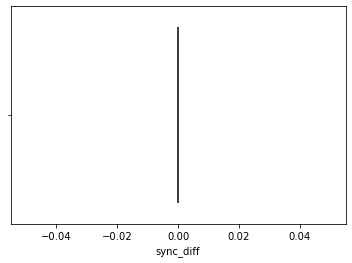

In [2050]:
for i in range(len(column_list)):
    sns.boxplot(x=df_ac[column_list[19]])

In [2042]:
df_ac = df_ac[~((df_ac[column_list[18]] > 2e6))]

In [2051]:
df_ac.shape

(2643, 26)

In [2052]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [2053]:
X_ac = df_ac.drop(['cw','Type'],1)
y_ac = df_ac['cw']

In [2060]:
X = X_ac.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,NaN
1,First targeted Org: Bank Account Active,inf
2,First targeted Org: Bills,inf
3,First targeted Org: Checks,NaN
4,First targeted Org: Entered Billing CC,1.231049
5,First targeted Org: Invoices,NaN
6,First targeted Org: Offline Payments,NaN
7,First targeted Org: Online Payments,NaN
8,First targeted Org: Received CC Payments,NaN
9,First targeted Org: Received ACHs,NaN


In [2061]:
X = X_ac.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF
1,First targeted Org: Bank Account Active,inf
2,First targeted Org: Bills,inf


In [2062]:
calc_vif(X)[calc_vif(X)['VIF'].isna() == False]

,variables,VIF
1,First targeted Org: Bank Account Active,inf
2,First targeted Org: Bills,inf
4,First targeted Org: Entered Billing CC,1.231049
12,user,1.365199
13,industry_enter,2.403056
15,n_employees_c_enter,1.953924
16,login_diff,1.115915
20,sub_tier_SMB_TIER1,1.333889


In [2063]:
X_ac = df_ac.drop(['cw','Type'],1)
y_ac = df_ac['cw']

In [2064]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_ac, y_ac, test_size=0.33, random_state=101)

### Lasso Logistic Regression

In [2065]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2066]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9451977401129944

In [2067]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[725  42]
 [ 21  85]]


In [2068]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9278350515463918

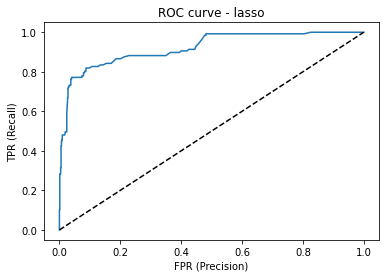

Area under curve (AUC):  0.9213812247999832


In [2069]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2070]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       746
           1       0.80      0.67      0.73       127

    accuracy                           0.93       873
   macro avg       0.87      0.82      0.84       873
weighted avg       0.92      0.93      0.93       873



### Ridge Logistic Regression

In [2071]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2072]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.867231638418079

In [2073]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[746 126]
 [  0   1]]


In [2078]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8556701030927835

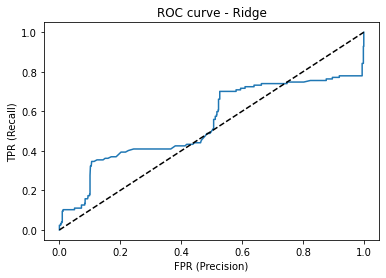

Area under curve (AUC):  0.5420246564353719


In [2079]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2080]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       746
           1       1.00      0.01      0.02       127

    accuracy                           0.86       873
   macro avg       0.93      0.50      0.47       873
weighted avg       0.88      0.86      0.79       873



Text(0.5, 0, 'False Positive Rate')

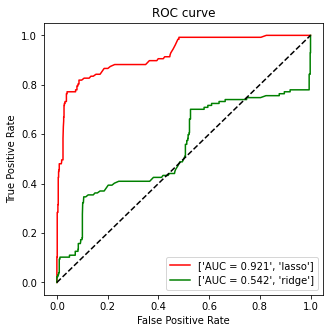

In [2081]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [2083]:
df_ac.user.unique()

array([ 1.,  0.,  3.,  2.,  5.,  9.,  8.,  6., 10., 67., 12.,  4., 13.,
       28.,  7., 19., 68., 16., 11., 22.])

In [2084]:
corr_matrix = df_ac.corr()
print(corr_matrix["cw"].sort_values(ascending=False))

cw                                              1.000000
First targeted Org: Entered Billing CC          0.683689
user                                            0.272459
login_diff                                      0.085784
sub_tier_TBD                                    0.015534
First targeted Org: Bills                      -0.007763
First targeted Org: Bank Account Active        -0.007763
sub_tier_SMB_TIER1                             -0.015534
industry_enter                                 -0.225952
n_employees_c_enter                            -0.334968
First targeted Org: ACHs                             NaN
First targeted Org: Checks                           NaN
First targeted Org: Invoices                         NaN
First targeted Org: Offline Payments                 NaN
First targeted Org: Online Payments                  NaN
First targeted Org: Received CC Payments             NaN
First targeted Org: Received ACHs                    NaN
First targeted Org: Received Ma

In [2085]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,3.736167,1.0
12,user,0.705793,2.0
16,login_diff,0.000004,3.0
0,First targeted Org: ACHs,0.000000,12.5
21,sub_tier_SMB_TIER2,0.000000,12.5
20,sub_tier_SMB_TIER1,0.000000,12.5
19,sub_tier_MM_TIER2,0.000000,12.5
18,sub_tier_MM_TIER1,0.000000,12.5
17,sync_diff,0.000000,12.5
14,business_type,0.000000,12.5


## For Accountant Client

In [2086]:
df_acl.shape

(5670, 26)

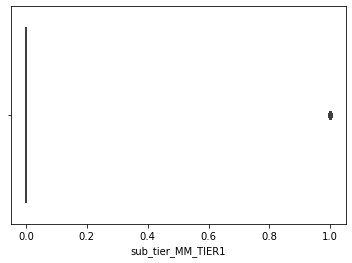

In [2139]:
for i in range(len(column_list)):
    sns.boxplot(x=df_acl[column_list[20]])

In [2137]:
df_acl = df_acl[~((df_acl[column_list[19]] > 600000))]

In [2140]:
df_acl.shape

(5616, 26)

In [2141]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [2142]:
X_acl = df_acl.drop(['cw','Type'],1)
y_acl = df_acl['cw']

In [2143]:
X = X_acl.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,31.311708
1,First targeted Org: Bank Account Active,1.359000
2,First targeted Org: Bills,1.717680
3,First targeted Org: Checks,106.598910
4,First targeted Org: Entered Billing CC,1.139868
5,First targeted Org: Invoices,1.116715
6,First targeted Org: Offline Payments,1.335288
7,First targeted Org: Online Payments,168.100082
8,First targeted Org: Received CC Payments,1.011758
9,First targeted Org: Received ACHs,1.206658


In [2144]:
X = X_acl.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF
0,First targeted Org: ACHs,31.311708
3,First targeted Org: Checks,106.598910
7,First targeted Org: Online Payments,168.100082


In [2147]:
X_acl = X_acl.drop(['First targeted Org: Online Payments'],1)

In [2148]:
X = X_acl.iloc[:,:-1]
calc_vif(X)[calc_vif(X).VIF > 10]

,variables,VIF


In [2149]:
X = X_acl.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,First targeted Org: ACHs,1.264799
1,First targeted Org: Bank Account Active,1.354266
2,First targeted Org: Bills,1.715502
3,First targeted Org: Checks,1.393501
4,First targeted Org: Entered Billing CC,1.139831
5,First targeted Org: Invoices,1.116357
6,First targeted Org: Offline Payments,1.333757
7,First targeted Org: Received CC Payments,1.011738
8,First targeted Org: Received ACHs,1.206404
9,First targeted Org: Received Manual Payments,1.187173


In [2152]:
X_acl = df_ac.drop(['cw','Type'],1)
y_acl = df_ac['cw']

In [2169]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_acl, y_acl, test_size=0.33, random_state=101)

### Lasso Logistic Regression

In [2154]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2155]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9451977401129944

In [2156]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[725  42]
 [ 21  85]]


In [2157]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9278350515463918

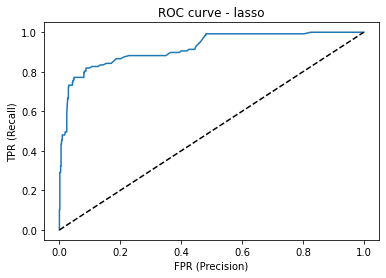

Area under curve (AUC):  0.9209695805450592


In [2158]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2159]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       746
           1       0.80      0.67      0.73       127

    accuracy                           0.93       873
   macro avg       0.87      0.82      0.84       873
weighted avg       0.92      0.93      0.93       873



### Ridge Logistic Regression

In [2160]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2161]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.867231638418079

In [2162]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[746 126]
 [  0   1]]


In [2163]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8556701030927835

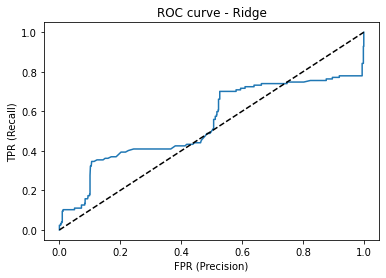

Area under curve (AUC):  0.5420246564353719


In [2164]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2165]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       746
           1       1.00      0.01      0.02       127

    accuracy                           0.86       873
   macro avg       0.93      0.50      0.47       873
weighted avg       0.88      0.86      0.79       873



Text(0.5, 0, 'False Positive Rate')

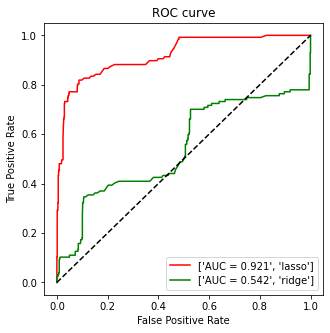

In [2166]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Lasso is better than ridge.

In [2167]:
corr_matrix = df_acl.corr()
print(corr_matrix["cw"].sort_values(ascending=False))

cw                                              1.000000
First targeted Org: Bank Account Active         0.287474
user                                            0.140511
First targeted Org: Online Payments             0.118543
First targeted Org: Uploaded Documents          0.106615
First targeted Org: Entered Billing CC          0.099543
First targeted Org: Checks                      0.096585
First targeted Org: ACHs                        0.094048
First targeted Org: Offline Payments            0.077188
First targeted Org: Bills                       0.077176
sync_diff                                       0.067523
sub_tier_SMB_TIER1                              0.062228
sub_tier_MM_TIER1                               0.031237
First targeted Org: Received Manual Payments    0.019095
First targeted Org: Received ACHs               0.018975
First targeted Org: Received CC Payments        0.009785
sub_tier_MM_TIER2                               0.009664
First targeted Org: Invoices   

In [2170]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,3.726390,1.0
12,user,0.689038,2.0
16,login_diff,0.000004,3.0
0,First targeted Org: ACHs,0.000000,12.5
21,sub_tier_SMB_TIER2,0.000000,12.5
20,sub_tier_SMB_TIER1,0.000000,12.5
19,sub_tier_MM_TIER2,0.000000,12.5
18,sub_tier_MM_TIER1,0.000000,12.5
17,sync_diff,0.000000,12.5
14,business_type,0.000000,12.5


## For Accountant Channel

In [2171]:
X_a = df_ac.drop(['cw','Type'],1)
y_a = df_ac['cw']

In [2172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_a, y_a, test_size=0.33, random_state=101)

### Lasso Logistic Regression

In [2173]:
from sklearn.linear_model import LogisticRegression
lassolr = LogisticRegression(penalty='l1', solver='liblinear')
lassolr.fit(X_train, y_train)
y_pred = lassolr.predict(X_test)

In [2174]:
# check the accuracy on the training set
lassolr.score(X_train, y_train)

0.9446327683615819

In [2175]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred, y_test))

[[725  42]
 [ 21  85]]


In [2176]:
# check the accuracy on the test set
lassolr.score(X_test, y_test)

0.9278350515463918

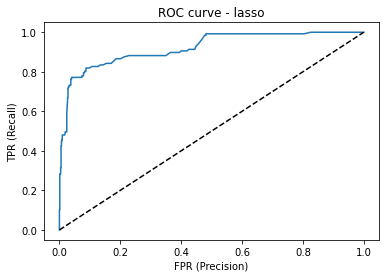

Area under curve (AUC):  0.9213812247999832


In [2177]:
from sklearn.metrics import roc_curve, auc
y_score = lassolr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - lasso')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2178]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       746
           1       0.80      0.67      0.73       127

    accuracy                           0.93       873
   macro avg       0.87      0.82      0.84       873
weighted avg       0.92      0.93      0.93       873



### Ridge Logistic Regression

In [2179]:
from sklearn.linear_model import LogisticRegression
ridgelr = LogisticRegression()
ridgelr.fit(X_train, y_train)
y_pred2 = ridgelr.predict(X_test)

In [2180]:
# check the accuracy on the training set
ridgelr.score(X_train, y_train)

0.867231638418079

In [2181]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_pred2, y_test))

[[746 126]
 [  0   1]]


In [2182]:
# check the accuracy on the test set
ridgelr.score(X_test, y_test)

0.8556701030927835

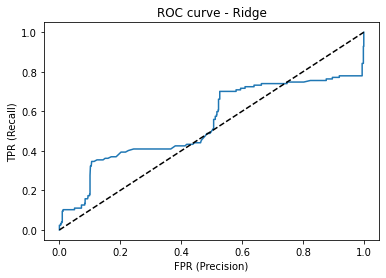

Area under curve (AUC):  0.5420246564353719


In [2183]:
from sklearn.metrics import roc_curve, auc
y_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_score)

title('ROC curve - Ridge')
xlabel('FPR (Precision)')
ylabel('TPR (Recall)')

plot(fpr,tpr)
plot((0,1), ls='dashed',color='black')
plt.show()
print('Area under curve (AUC): ', auc(fpr,tpr))

In [2184]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       746
           1       1.00      0.01      0.02       127

    accuracy                           0.86       873
   macro avg       0.93      0.50      0.47       873
weighted avg       0.88      0.86      0.79       873



Text(0.5, 0, 'False Positive Rate')

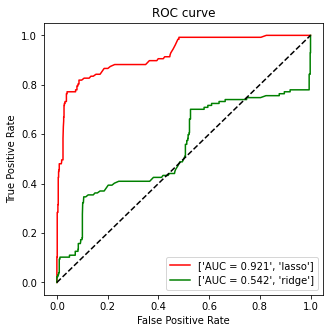

In [2185]:
from sklearn.metrics import roc_curve, auc
y_lasso_score = lassolr.predict_proba(X_test)[:,1]
y_ridge_score = ridgelr.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_lasso_score)
fpr2, tpr2, _2 = roc_curve(y_test, y_ridge_score)

import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.title('ROC curve')
plt.plot(fpr,tpr, color = 'red', label = ['AUC = %0.3f' % auc(fpr,tpr),'lasso'])
plt.plot(fpr2,tpr2, color = 'green', label = ['AUC = %0.3f' % auc(fpr2,tpr2),'ridge'])

plt.plot((0,1), ls='dashed',color='black')
plt.legend(loc = 'lower right')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

### Lasso is better than ridge.

In [2187]:
dfr = pd.DataFrame({"Feature":X_train.columns.tolist(),"Coefficients":lassolr.coef_[0]})
dfr["Rank"] = dfr["Coefficients"].rank(ascending = False) 
dfr.sort_values("Rank", inplace = True) 
dfr

,Feature,Coefficients,Rank
4,First targeted Org: Entered Billing CC,3.737393,1.0
12,user,0.703570,2.0
16,login_diff,0.000004,3.0
0,First targeted Org: ACHs,0.000000,12.5
21,sub_tier_SMB_TIER2,0.000000,12.5
20,sub_tier_SMB_TIER1,0.000000,12.5
19,sub_tier_MM_TIER2,0.000000,12.5
18,sub_tier_MM_TIER1,0.000000,12.5
17,sync_diff,0.000000,12.5
14,business_type,0.000000,12.5
